# Présentation du projet Puissance 4 - Python

*Ce projet a été réalise dans le cadre de la validation du cours de Python donné par Selim Mellouk par Stephen Claco, Adrien Demaegdt, Aldin Steeve Houssou et Arthur Souchon*

Plusieurs modes de jeu sont disponibles et sont présentés ci-dessous:

## Joueur vs Joueur - Joueur vs IA

Un joueur humain peut jouer au jeu de puissance 4. Lorsqu'il va lancer la partie, il devrait à chaque fois écrire un entier de 1 à 7 (les inputs sont blindés) afin de sélectionner la colonne dans laquelle il veut jouer. Une fenêtre va s'ouvrir afin d'afficher le tableau. Cependant on ne peut pas cliquer dessus pour sélectionner sa colonne, c'est pourquoi on vous conseille de jouer en écran scindé entre la fenêtre de jeu et le notebook.

## IA vs IA

On peut également faire s'affronter des IA entre elles pendant plusieurs parties. Il y a trois IA différentes :

* **Une IA Aléatoire** qui joue de manière totalement aléatoire entre les sept colonnes du Puissance 4. Elle est donc simple à battre.
* **Une IA pas trop bête** qui optimise ses coups en fonctions des alignements et qui essaie de jouer plutôt vers le centre afin de se laisser le plus d'options possibles. A chaque coup, elle simule ce que donnerait le tableau en jouant dans chaque colonne et choisit la colonne qui lui donne le meilleur tableau possible.
* **Une IA Intelligente** qui reprends les mêmes principes que l'IA précedente, sauf qu'elle anticipe aussi les coups de l'adversaire et donc elle peut essayer de contrer ce qu'il va faire.

## Rapport de fin de match

A la fin d'un affrontement (potentiellement plusieurs matchs), vous aurez un petit rapport vous indiquant le nombre de parties jouées, et le nombre de parties remportées par chacun des joueurs.
Vous trouverez également un graphique, réalisé avec matplotlib, indiquant l'évolution du winrate de chacun des deux joueurs.

## Ce qu'on vous conseille de tester

Etant donné que certains tests peuvent durer longtemps, voilà ce qu'on vous conseille de tester (entre chaque test il sera nécessaire de relancer le kernel) :

* Un match en Joueur vs Joueur ou Joueur vs IA (pensez à vous mettre en écran scindé entre la fenêtre de jeu et le notebook)
* Une simulation IA Aléatoire vs IA Intelligente (environ 50-100 parties pour pas que ça soit trop long, mais pour voir que l'IA Intelligente écrase l'IA Aléatoire)
* Une simulation de plus grande ampleur entre l'IA Aléatoire et l'IA pas trop bête (200-300 matchs ? )
* Si vous avez envie de tester un match entre l'IA pas trop bête et l'IA intelligente, allez-y, mais étant données que ces IA sont régies par des règles déterministes, toutes les parties entre ces IA sont exactement identiques.


In [3]:
pip install pygame


     |████████████████████████████████| 11.8 MB 144 kB/s 


In [6]:
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

Qui est le joueur 1 ? : 1 = Humain, 2 = IA Aléatoire, 3= IA pas trop bête, 4 = IA Intelligente
1
Qui est le joueur 2 ? : 1 = Humain, 2 = IA Aléatoire, 3= IA pas trop bête, 4 = IA Intelligente
3
Combien de parties veut-tu faire ?
1
on va jouer 1 partie !
     col1 col2 col3 col4 col5 col6 col7
lig1    .    .    .    .    .    .    .
lig2    .    .    .    .    .    .    .
lig3    .    .    .    .    .    .    .
lig4    .    .    .    .    .    .    .
lig5    .    .    .    .    .    .    .
lig6    .    .    .    .    .    .    .
Joueur 1, à toi de jouer !
Dans quelle colonne veux-tu placer ton pion ? (1-7)
Merci de choisir une colonne entre 1 et 7
2
tu as choisis la colonne 2
     col1 col2 col3 col4 col5 col6 col7
lig1    .    .    .    .    .    .    .
lig2    .    .    .    .    .    .    .
lig3    .    .    .    .    .    .    .
lig4    .    .    .    .    .    .    .
lig5    .    .    .    .    .    .    .
lig6    .    J    .    .    .    .    .
Joueur 2, à toi de jouer !
     col1

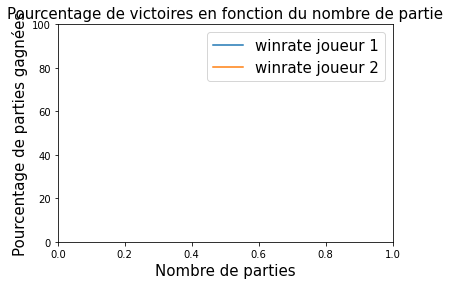

In [7]:
import pandas as pd
import random
import os
os.environ['PYGAME_HIDE_SUPPORT_PROMPT'] = "hide" #Permet de cacher le message de bienvenue de pygame
import pygame
import matplotlib.pyplot as plt



#Classe permettant le bon fonctionnement du jeu
class Puissance4:
    def __init__(self):
        self.grille=pd.DataFrame()
                  
    def verif_victoire(self,grille): #Fonction vérifiant si 4 pions de la même couleur sont alignés
        victoire=False
        verif_l = self.verif_ligne(grille)
        verif_c = self.verif_colonne(grille)
        verif_dm = self.verif_diago_montante(grille)
        verif_dd = self.verif_diago_descendante(grille)
        if verif_l or verif_c or verif_dm or verif_dd:
            victoire=True
        return victoire
    
    def verif_ligne(self,grille): #Fonction vérifiant si 4 pions de la même couleur sont alignés sur la même ligne
        verif=False
        for i in range(1,7,1):
            if self.check_alignement(self.grille.loc["lig"+str(i)]):
                verif = True
                print(f"il y a un alignement dans la {i} eme ligne")
        return verif
    
    def verif_colonne(self,grille): #Fonction vérifiant si 4 pions de la même couleur sont alignés sur la même colonne
        verif=False
        for i in range(1,8,1):
            if self.check_alignement(self.grille["col"+str(i)]):
                verif = True
                print(f"il y a un alignement dans la {i} eme colonne")
        return verif
    
    def verif_diago_montante(self,grille): #Fonction vérifiant si 4 pions de la même couleur sont alignés sur la même diagonale montante
        verif=False
        diago_1 = []
        diago_2 = []
        diago_3 = []
        diago_4 = []
        diago_5 = []
        diago_6 = []
        diago_7 = []
        diago_8 = []
        diago_9 = []
        diago_10 = []
        diago_11 = []
        diago_12 = []
        
        for k in range(1, 5):
            diago_1.append(grille["col"+str(k)][f"lig{k}"])
            diago_2.append(grille["col"+str(k)][f"lig{k+1}"])
            diago_3.append(grille["col"+str(k)][f"lig{k+2}"])
            diago_4.append(grille["col"+str(k+1)][f"lig{k}"])
            diago_5.append(grille["col"+str(k+1)][f"lig{k+1}"])
            diago_6.append(grille["col"+str(k+1)][f"lig{k+2}"])
            diago_7.append(grille["col"+str(k+2)][f"lig{k}"])
            diago_8.append(grille["col"+str(k+2)][f"lig{k+1}"])
            diago_9.append(grille["col"+str(k+2)][f"lig{k+2}"])
            diago_10.append(grille["col"+str(k+3)][f"lig{k}"])
            diago_11.append(grille["col"+str(k+3)][f"lig{k+1}"])
            diago_12.append(grille["col"+str(k+3)][f"lig{k+2}"])
               
        diagonales_possibles = [diago_1, diago_2, diago_3, diago_4, diago_5, diago_6, diago_7, diago_8, diago_9, diago_10, diago_11, diago_12]

        for liste in diagonales_possibles:
            if self.check_alignement(liste):
                verif = True
                print("Il y a un alignement dans la diagonale montante ")
        
        return verif
    
    def verif_diago_descendante(self,grille): #Fonction vérifiant si 4 pions de la même couleur sont alignés sur la même diagonale descendante
        verif=False
        diago_1 = []
        diago_2 = []
        diago_3 = []
        diago_4 = []
        diago_5 = []
        diago_6 = []
        diago_7 = []
        diago_8 = []
        diago_9 = []
        diago_10 = []
        diago_11 = []
        diago_12 = []
        
        for k in range(1, 5):
            diago_1.append(grille["col"+str(k)][f"lig{5-k}"])
            diago_2.append(grille["col"+str(k)][f"lig{6-k}"])
            diago_3.append(grille["col"+str(k)][f"lig{7-k}"])
            diago_4.append(grille["col"+str(k+1)][f"lig{5-k}"])
            diago_5.append(grille["col"+str(k+1)][f"lig{6-k}"])
            diago_6.append(grille["col"+str(k+1)][f"lig{7-k}"])
            diago_7.append(grille["col"+str(k+2)][f"lig{5-k}"])
            diago_8.append(grille["col"+str(k+2)][f"lig{6-k}"])
            diago_9.append(grille["col"+str(k+2)][f"lig{7-k}"])
            diago_10.append(grille["col"+str(k+3)][f"lig{5-k}"])
            diago_11.append(grille["col"+str(k+3)][f"lig{6-k}"])
            diago_12.append(grille["col"+str(k+3)][f"lig{7-k}"])
               
        diagonales_possibles = [diago_1, diago_2, diago_3, diago_4, diago_5, diago_6, diago_7, diago_8, diago_9, diago_10, diago_11, diago_12]

        for liste in diagonales_possibles:
            if self.check_alignement(liste):
                verif = True
                print("Il y a un alignement dans la diagonale descendante ")
        return verif
    
    def check_alignement(self, liste): #Fonction vérifiant si 4 pions alignés sont de la même couleur
        alignement = False
        for i in range(len(liste)-3):
            if liste[i] == liste[i+1] == liste[i+2] == liste[i+3] and liste[i] != "." :
                alignement = True
        return alignement
    
    def afficher_grille(self,fenetre,isthereplayer): #Fonction qui affiche la grille (et la fenêtre de jeu si un des joueurs est un humain)
        print(game.grille)
        black = (0,0,0)
        red = (255,0,0)
        yellow = (255,255,0)
        blue = (0,0,255)
        if isthereplayer:
            fenetre.fill(blue)
            for i in range (1,8):
                for j in range (1,7):
                    if game.grille["col"+str(i)]["lig"+str(j)]==".":
                        pygame.draw.circle(fenetre, black, (i*80,j*80), 35, 0)
                    elif game.grille["col"+str(i)]["lig"+str(j)]=="J":
                        pygame.draw.circle(fenetre, yellow, (i*80,j*80), 35, 0)
                    elif game.grille["col"+str(i)]["lig"+str(j)]=="R":
                        pygame.draw.circle(fenetre, red, (i*80,j*80), 35, 0)

            pygame.display.update()
            
    def init_game(self): #Initialisation du jeu (grille, joueurs, fenêtre pygame si nécessaire)
        l1 = [".",".",".",".",".",".","."]
        self.grille = pd.DataFrame([l1, l1, l1, l1, l1, l1], columns=["col1","col2","col3","col4","col5","col6","col7"], index=["lig1","lig2","lig3","lig4","lig5","lig6"])
        nbia=0
        choice=input("Qui est le joueur 1 ? : 1 = Humain, 2 = IA Aléatoire, 3= IA pas trop bête, 4 = IA Intelligente\n")
        while choice!="1" and choice != "2" and choice !="3" and choice !="4":
            choice=input("Qui est le joueur 1 ? : 1 = Humain, 2 = IA Aléatoire, 3= IA pas trop bête, 4 = IA Intelligente\n")
        if choice=="1":
            joueur1=Humain()
        elif choice == "2":
            joueur1 = Iaaleatoire()
            nbia+=1
        elif choice == "3":
            joueur1 = Iapastropbete()
            nbia+=1
        else:
            joueur1 = Iaintelligente()
            nbia+=1
        choice=input("Qui est le joueur 2 ? : 1 = Humain, 2 = IA Aléatoire, 3= IA pas trop bête, 4 = IA Intelligente\n")
        while choice!="1" and choice != "2" and choice != "4" and choice !="3":
            choice=input("Qui est le joueur 2 ? : 1 = Humain, 2 = IA Aléatoire, 3= IA pas trop bête, 4 = IA Intelligente\n")
        if choice=="1":
            joueur2=Humain()
        elif choice == "2":
            joueur2 = Iaaleatoire()
            nbia+=1
        elif choice == "3":
            joueur2 = Iapastropbete()
            nbia+=1
        else:
            joueur2 = Iaintelligente()
            nbia+=1
        
        joueur1.couleur="J"
        joueur2.couleur="R"
        
        nombre_partie_total=input("Combien de parties veut-tu faire ?\n")
        isthererealplayer=True
        if nbia == 2:
            isthererealplayer=False
            fenetre=0
        else:
            pygame.init()
            fenetre = pygame.display.set_mode((640, 540))
        game.play_game(joueur1,joueur2,isthererealplayer,nombre_partie_total,fenetre)
        
    def play_game(self,joueur1,joueur2,isthererealplayer,nombre_partie_total,fenetre):
        tour=1
        winratej1=[]
        winratej2=[]
        verif=game.verif_victoire(game.grille)
        #Boucle de jeu qui tourne jusqu'à ce que les conditions de victoires soient remplies
        nombre_partie_jouee=0
        nombre_partie_total=int(nombre_partie_total)
        print(f'on va jouer {nombre_partie_total} partie !')
        while nombre_partie_jouee<nombre_partie_total:
            nombre_partie_jouee+=1
            while verif==False:
                if isthererealplayer:
                    game.afficher_grille(fenetre,isthererealplayer)
                #Le joueur fait son choix
                if tour%2==1:
                    if isthererealplayer:
                        print("Joueur 1, à toi de jouer !")
                    choix=joueur1.faire_un_choix(game.grille)

                else:
                    if isthererealplayer:
                        print("Joueur 2, à toi de jouer !")
                    choix=joueur2.faire_un_choix(game.grille)

                i=6
                while i>=1:
                    if game.grille[f"col{choix}"][f"lig{i}"]==".":
                        if tour%2==1:
                            game.grille[f"col{choix}"][f"lig{i}"]=joueur1.couleur
                        else:
                            game.grille[f"col{choix}"][f"lig{i}"]=joueur2.couleur
                        i=-10
                    i+=-1

                verif=game.verif_victoire(game.grille)
                tour+=1
            game.afficher_grille(fenetre,isthererealplayer)
            verif=False
            #Réinitialisation de la grille après une partie
            l1 = [".",".",".",".",".",".","."]
            self.grille = pd.DataFrame([l1, l1, l1, l1, l1, l1], columns=["col1","col2","col3","col4","col5","col6","col7"], index=["lig1","lig2","lig3","lig4","lig5","lig6"])
            print(f"Le joueur {tour%2 +1} a gagné !")
            if(tour%2 +1 == 1):
                joueur1.score+=1
            else:
                joueur2.score+=1
            winratej1.append((joueur1.score/nombre_partie_jouee)*100)
            winratej2.append((joueur2.score/nombre_partie_jouee)*100)
        self.fin_des_parties(nombre_partie_total,joueur1,joueur2,fenetre,winratej1,winratej2)

    def fin_des_parties(self,nb_parties,j1,j2,fenetre,winratej1,winratej2):
        pygame.display.quit()
        pygame.quit()
        print(f'Fin des parties. \n Nombre de parties jouées : {nb_parties}')
        print(f'Joueur 1 a gagné {j1.score} parties')
        print(f'Joueur 2 a gagné {j2.score} parties')
        self.montrer_statistiques(nb_parties,winratej1,winratej2)
    
    def montrer_statistiques(self,nb_parties,winratej1,winratej2):
        
        l=[]
        for i in range (1,nb_parties+1):
            l.append(i)
        
        plt.plot(l,winratej1,label="winrate joueur 1")
        plt.plot(l,winratej2,label="winrate joueur 2")
        plt.legend(fontsize=15)
        plt.title("Pourcentage de victoires en fonction du nombre de partie", fontsize=15)
        plt.xlabel("Nombre de parties", fontsize=15)
        plt.ylabel("Pourcentage de parties gagnées", fontsize=15)
        plt.ylim((0, 100))
        plt.xlim((0, nb_parties))
        plt.show()
            

class Humain:
    def __init__(self):
        self.choix=10
        self.score=0
        self.couleur="not"
    
    def faire_un_choix(self, grille):
        print("Dans quelle colonne veux-tu placer ton pion ? (1-7)")
        self.choix="not"
        while self.choix!="1" and self.choix!="2" and self.choix!="3" and self.choix!="4" and self.choix!="5" and self.choix!="6" and self.choix!="7":
            print("Merci de choisir une colonne entre 1 et 7")
            self.choix=input()
            print(f"tu as choisis la colonne {self.choix}")
            if grille["col"+self.choix]["lig1"]!=".":
                print('Cette colonne est pleine !')
                self.choix="not"
        return self.choix

class Iaaleatoire:
    def __init__(self):
        self.choix=10
        self.score=0
        self.couleur="not"
        
    def faire_un_choix(self,grille):
        self.choix=random.randint(1,7)
        while grille["col"+str(self.choix)]["lig1"]!=".":
            self.choix=random.randint(1,7)
        return self.choix
    
class Iapastropbete:
    def __init__(self):
        self.choix=10
        self.score=0
        self.couleur="not"
    
    def faire_un_choix(self,grille):
        self.choix=self.faire_le_meilleur_choix(grille)
        while grille["col"+str(self.choix)]["lig1"]!=".":
            self.choix=self.faire_le_meilleur_choix(grille)
        return self.choix
        
    def faire_le_meilleur_choix(self,grille):
        score=[0,0,0,0,0,0,0]
        for i in range (1,8):
            score[i-1]=self.calculer_score_tableau(grille,i)
            if i==1 or i==7:
                score[i-1]=score[i-1]*0.9
            elif i==2 or i==6:
                score[i-1]=score[i-1]*0.95
            elif i==4:
                score[i-1]=score[i-1]*1.05
        
        max=-1000000
        meilleur_choix=1
        #print(score)
        for i in range (1,8):
            if score[i-1]>max and grille["col"+str(i)]["lig1"]==".":
                max=score[i-1]
                meilleur_choix=i
                
        return meilleur_choix
    
    def calculer_score_tableau(self,grille,colonne):
        score=0
        tab=grille
        for i in range(6,0,-1):
            if tab["col"+str(colonne)]["lig"+str(i)] == ".":
                tab["col"+str(colonne)]["lig"+str(i)] = self.couleur
                break
                    
        score_col=self.score_colonne(tab)
        score_lig=self.score_ligne(tab)
        score_dia_mont=self.score_diago_montante(tab)
        score_dia_des=self.score_diago_descendante(tab)
        
        score=score_col+score_lig+score_dia_mont+score_dia_des
        tab["col"+str(colonne)]["lig"+str(i)] = "."
        return score
    
    def score_colonne(self,tab):
        score=0
        couleur_pion=self.couleur
        for i in range (1,8):
            for j in range (1,7):
                if j <= 3 and tab["col"+str(i)]["lig"+str(j)] == self.couleur and tab["col"+str(i)]["lig"+str(j+1)] == self.couleur and tab["col"+str(i)]["lig"+str(j+2)] == self.couleur and tab["col"+str(i)]["lig"+str(j+3)] == self.couleur:
                    score+=10000
                    break
                elif j <= 4 and tab["col"+str(i)]["lig"+str(j)] == self.couleur and tab["col"+str(i)]["lig"+str(j+1)] == self.couleur and tab["col"+str(i)]["lig"+str(j+2)] == self.couleur:
                    score+=50
                    break
                elif j <= 5 and tab["col"+str(i)]["lig"+str(j)] == self.couleur and tab["col"+str(i)]["lig"+str(j+1)] == self.couleur:
                    score+=10
                    break
                elif j <= 6 and tab["col"+str(i)]["lig"+str(j)] == self.couleur: 
                    score+=1
                    break
                else:
                    score+=0
        return score
    
    def score_ligne(self,tab):
        score=0
        couleur_pion=self.couleur
        for i in range(1,7):
            for j in range (1,8):
                if j<=4 and tab["col"+str(j)]["lig"+str(i)] == self.couleur and tab["col"+str(j+1)]["lig"+str(i)] == self.couleur and tab["col"+str(j+2)]["lig"+str(i)] == self.couleur and tab["col"+str(j+3)]["lig"+str(i)] == self.couleur:
                    score+=10000
                    break
                elif j<=5 and tab["col"+str(j)]["lig"+str(i)] == self.couleur and tab["col"+str(j+1)]["lig"+str(i)] == self.couleur and tab["col"+str(j+2)]["lig"+str(i)] == self.couleur:
                    score+=50
                    break
                elif j<=6 and tab["col"+str(j)]["lig"+str(i)] == self.couleur and tab["col"+str(j+1)]["lig"+str(i)] == self.couleur:
                    score+=10
                    break
                elif j <= 7 and tab["col"+str(j)]["lig"+str(i)] == self.couleur: 
                    score+=1
                    break
                else:
                    score+=0
        return score
    
    def score_diago_montante(self,tab):
        score=0
        couleur_pion=self.couleur
        for j in range (1,5):
            for i in range (1,4):
                if tab["col"+str(j)]["lig"+str(i)] == self.couleur and tab["col"+str(j+1)]["lig"+str(i+1)] == self.couleur and tab["col"+str(j+2)]["lig"+str(i+2)] == self.couleur and tab["col"+str(j+3)]["lig"+str(i+3)] == self.couleur:
                    score+=10000
                    break
                elif (tab["col"+str(j)]["lig"+str(i)] == self.couleur and tab["col"+str(j+1)]["lig"+str(i+1)] == self.couleur and tab["col"+str(j+2)]["lig"+str(i+2)] == self.couleur) or (tab["col"+str(j+3)]["lig"+str(i)] == self.couleur and tab["col"+str(j+1)]["lig"+str(i+1)] == self.couleur and tab["col"+str(j+2)]["lig"+str(i+2)] == self.couleur):
                    score+=50
                    break
                elif (tab["col"+str(j)]["lig"+str(i)] == self.couleur and tab["col"+str(j+1)]["lig"+str(i+1)] == self.couleur) or (tab["col"+str(j+2)]["lig"+str(i+2)] == self.couleur and tab["col"+str(j+1)]["lig"+str(i+1)] == self.couleur) or (tab["col"+str(j+2)]["lig"+str(i+2)] == self.couleur and tab["col"+str(j+3)]["lig"+str(i+3)] == self.couleur):
                    score+=10
                    break
                elif tab["col"+str(j)]["lig"+str(i)] == self.couleur or tab["col"+str(j+1)]["lig"+str(i+1)] == self.couleur or tab["col"+str(j+2)]["lig"+str(i+2)] == self.couleur or tab["col"+str(j+3)]["lig"+str(i+3)] == self.couleur:
                    score+=1
                    break
                else:
                    score+=0
        return score
    
    def score_diago_descendante(self,tab):
        score=0
        couleur_pion=self.couleur
        for j in range (1,5):
            for i in range (4,7):
                if tab["col"+str(j)]["lig"+str(i)] == self.couleur and tab["col"+str(j+1)]["lig"+str(i-1)] == self.couleur and tab["col"+str(j+2)]["lig"+str(i-2)] == self.couleur and tab["col"+str(j+3)]["lig"+str(i-3)] == self.couleur:
                    score+=10000
                    break
                elif (tab["col"+str(j)]["lig"+str(i)] == self.couleur and tab["col"+str(j+1)]["lig"+str(i-1)] == self.couleur and tab["col"+str(j+2)]["lig"+str(i-2)] == self.couleur) or (tab["col"+str(j+3)]["lig"+str(i)] == self.couleur and tab["col"+str(j+1)]["lig"+str(i-1)] == self.couleur and tab["col"+str(j+2)]["lig"+str(i-2)] == self.couleur):
                    score+=50
                    break
                elif (tab["col"+str(j)]["lig"+str(i)] == self.couleur and tab["col"+str(j+1)]["lig"+str(i-1)] == self.couleur) or (tab["col"+str(j+2)]["lig"+str(i-2)] == self.couleur and tab["col"+str(j+1)]["lig"+str(i-1)] == self.couleur) or (tab["col"+str(j+2)]["lig"+str(i-2)] == self.couleur and tab["col"+str(j+3)]["lig"+str(i-3)] == self.couleur):
                    score+=10
                    break
                elif tab["col"+str(j)]["lig"+str(i)] == self.couleur or tab["col"+str(j+1)]["lig"+str(i-1)] == self.couleur or tab["col"+str(j+2)]["lig"+str(i-2)] == self.couleur or tab["col"+str(j+3)]["lig"+str(i-3)] == self.couleur:
                    score+=1
                    break
                else:
                    score+=0
        return score
    
class Iaintelligente:
    def __init__(self):
        self.choix=10
        self.score=0
        self.couleur="not"
    
    def faire_un_choix(self,grille):
        self.choix=self.faire_le_meilleur_choix(grille)
        while grille["col"+str(self.choix)]["lig1"]!=".":
            self.choix=self.faire_le_meilleur_choix(grille)
        return self.choix
        
    def faire_le_meilleur_choix(self,grille):
        score=[0,0,0,0,0,0,0]
        firstmove=True
        for i in range (1,8):
            score[i-1]=self.calculer_score_tableau(grille,i,firstmove)
            if i==1 or i==7:
                score[i-1]=score[i-1]*0.9
            elif i==2 or i==6:
                score[i-1]=score[i-1]*0.95
            elif i==4:
                score[i-1]=score[i-1]*1.05
        
        max=-1000000
        meilleur_choix=1
        #print(score)
        for i in range (1,8):
            if score[i-1]>max and grille["col"+str(i)]["lig1"]==".":
                max=score[i-1]
                meilleur_choix=i
                
        return meilleur_choix
    
    def calculer_score_tableau(self,grille,colonne,firstmove):
        score=0
        tab=grille
        for i in range(6,0,-1):
            if tab["col"+str(colonne)]["lig"+str(i)] == ".":
                if firstmove:
                    tab["col"+str(colonne)]["lig"+str(i)] = self.couleur
                    break
                elif self.couleur=="J":
                    tab["col"+str(colonne)]["lig"+str(i)] = "R"
                    break
                elif self.couleur=="R":
                    tab["col"+str(colonne)]["lig"+str(i)] = "J"
                    break
                    
        score_col=self.score_colonne(tab,firstmove)
        score_lig=self.score_ligne(tab,firstmove)
        score_dia_mont=self.score_diago_montante(tab,firstmove)
        score_dia_des=self.score_diago_descendante(tab,firstmove)
        
        score_nextmove=[0,0,0,0,0,0,0]
        score_nextmove_mean=0
        if firstmove:
            firstmove=False
            for k in range (1,8):
                score_nextmove[k-1]=self.calculer_score_tableau(grille,k,firstmove)
                if k==1 or k==7:
                    score_nextmove[k-1]=score_nextmove[k-1]*0.9
                elif k==2 or k==6:
                    score_nextmove[k-1]=score_nextmove[k-1]*0.95
                elif k==4:
                    score_nextmove[k-1]=score_nextmove[k-1]*1.05
            for m in range(len(score_nextmove)):
                score_nextmove_mean+=score_nextmove[m]
            score_nextmove_mean=score_nextmove_mean/7
        score=score_col+score_lig+score_dia_mont+score_dia_des-score_nextmove_mean
        tab["col"+str(colonne)]["lig"+str(i)] = "."
        return score
    
    def score_colonne(self,tab,firstmove):
        score=0
        if firstmove:
            couleur_pion=self.couleur
        elif self.couleur=="J":
            couleur_pion="R"
        elif self.couleur=="R":
            couleur_pion="J"
        
        for i in range (1,8):
            for j in range (1,7):
                if j <= 3 and tab["col"+str(i)]["lig"+str(j)] == couleur_pion and tab["col"+str(i)]["lig"+str(j+1)] == couleur_pion and tab["col"+str(i)]["lig"+str(j+2)] == couleur_pion and tab["col"+str(i)]["lig"+str(j+3)] == couleur_pion:
                    score+=10000
                    break
                elif j <= 4 and tab["col"+str(i)]["lig"+str(j)] == couleur_pion and tab["col"+str(i)]["lig"+str(j+1)] == couleur_pion and tab["col"+str(i)]["lig"+str(j+2)] == couleur_pion:
                    score+=50
                    break
                elif j <= 5 and tab["col"+str(i)]["lig"+str(j)] == couleur_pion and tab["col"+str(i)]["lig"+str(j+1)] == couleur_pion:
                    score+=10
                    break
                elif j <= 6 and tab["col"+str(i)]["lig"+str(j)] == couleur_pion: 
                    score+=1
                    break
                else:
                    score+=0
        return score
    
    def score_ligne(self,tab,firstmove):
        score=0
        if firstmove:
            couleur_pion=self.couleur
        elif self.couleur=="J":
            couleur_pion="R"
        elif self.couleur=="R":
            couleur_pion="J"
        for i in range(1,7):
            for j in range (1,8):
                if j<=4 and tab["col"+str(j)]["lig"+str(i)] == couleur_pion and tab["col"+str(j+1)]["lig"+str(i)] == couleur_pion and tab["col"+str(j+2)]["lig"+str(i)] == couleur_pion and tab["col"+str(j+3)]["lig"+str(i)] == couleur_pion:
                    score+=10000
                    break
                elif j<=5 and tab["col"+str(j)]["lig"+str(i)] == couleur_pion and tab["col"+str(j+1)]["lig"+str(i)] == couleur_pion and tab["col"+str(j+2)]["lig"+str(i)] == couleur_pion:
                    score+=50
                    break
                elif j<=6 and tab["col"+str(j)]["lig"+str(i)] == couleur_pion and tab["col"+str(j+1)]["lig"+str(i)] == couleur_pion:
                    score+=10
                    break
                elif j <= 7 and tab["col"+str(j)]["lig"+str(i)] == couleur_pion: 
                    score+=1
                    break
                else:
                    score+=0
        return score
    
    def score_diago_descendante(self,tab,firstmove):
        score=0
        if firstmove:
            couleur_pion=self.couleur
        elif self.couleur=="J":
            couleur_pion="R"
        elif self.couleur=="R":
            couleur_pion="J"
        for j in range (1,5):
            for i in range (1,4):
                if tab["col"+str(j)]["lig"+str(i)] == couleur_pion and tab["col"+str(j+1)]["lig"+str(i+1)] == couleur_pion and tab["col"+str(j+2)]["lig"+str(i+2)] == couleur_pion and tab["col"+str(j+3)]["lig"+str(i+3)] == couleur_pion:
                    score+=10000
                    break
                elif (tab["col"+str(j)]["lig"+str(i)] == couleur_pion and tab["col"+str(j+1)]["lig"+str(i+1)] == couleur_pion and tab["col"+str(j+2)]["lig"+str(i+2)] == couleur_pion) or (tab["col"+str(j+3)]["lig"+str(i)] == couleur_pion and tab["col"+str(j+1)]["lig"+str(i+1)] == couleur_pion and tab["col"+str(j+2)]["lig"+str(i+2)] == couleur_pion):
                    score+=50
                    break
                elif (tab["col"+str(j)]["lig"+str(i)] == couleur_pion and tab["col"+str(j+1)]["lig"+str(i+1)] == couleur_pion) or (tab["col"+str(j+2)]["lig"+str(i+2)] == couleur_pion and tab["col"+str(j+1)]["lig"+str(i+1)] == couleur_pion) or (tab["col"+str(j+2)]["lig"+str(i+2)] == couleur_pion and tab["col"+str(j+3)]["lig"+str(i+3)] == couleur_pion):
                    score+=10
                    break
                elif tab["col"+str(j)]["lig"+str(i)] == couleur_pion or tab["col"+str(j+1)]["lig"+str(i+1)] == couleur_pion or tab["col"+str(j+2)]["lig"+str(i+2)] == couleur_pion or tab["col"+str(j+3)]["lig"+str(i+3)] == couleur_pion:
                    score+=1
                    break
                else:
                    score+=0
        return score
    
    def score_diago_montante(self,tab,firstmove):
        score=0
        if firstmove:
            couleur_pion=self.couleur
        elif self.couleur=="J":
            couleur_pion="R"
        elif self.couleur=="R":
            couleur_pion="J"
        for j in range (1,5):
            for i in range (4,7):
                if tab["col"+str(j)]["lig"+str(i)] == couleur_pion and tab["col"+str(j+1)]["lig"+str(i-1)] == couleur_pion and tab["col"+str(j+2)]["lig"+str(i-2)] == couleur_pion and tab["col"+str(j+3)]["lig"+str(i-3)] == couleur_pion:
                    score+=10000
                    break
                elif (tab["col"+str(j)]["lig"+str(i)] == couleur_pion and tab["col"+str(j+1)]["lig"+str(i-1)] == couleur_pion and tab["col"+str(j+2)]["lig"+str(i-2)] == couleur_pion) or (tab["col"+str(j+3)]["lig"+str(i)] == couleur_pion and tab["col"+str(j+1)]["lig"+str(i-1)] == couleur_pion and tab["col"+str(j+2)]["lig"+str(i-2)] == couleur_pion):
                    score+=50
                    break
                elif (tab["col"+str(j)]["lig"+str(i)] == couleur_pion and tab["col"+str(j+1)]["lig"+str(i-1)] == couleur_pion) or (tab["col"+str(j+2)]["lig"+str(i-2)] == couleur_pion and tab["col"+str(j+1)]["lig"+str(i-1)] == couleur_pion) or (tab["col"+str(j+2)]["lig"+str(i-2)] == couleur_pion and tab["col"+str(j+3)]["lig"+str(i-3)] == couleur_pion):
                    score+=10
                    break
                elif tab["col"+str(j)]["lig"+str(i)] == couleur_pion or tab["col"+str(j+1)]["lig"+str(i-1)] == couleur_pion or tab["col"+str(j+2)]["lig"+str(i-2)] == couleur_pion or tab["col"+str(j+3)]["lig"+str(i-3)] == couleur_pion:
                    score+=1
                    break
                else:
                    score+=0
        return score
    
game=Puissance4()
game.init_game()